# Customer Churn Prediction for TELCO Company

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Loading Dataset

In [2]:
df=pd.read_csv("Customer_Churn_Analysis.csv")
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Describing Dataset

In [3]:
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   5000 non-null   int64  
 1   account_length          5000 non-null   int64  
 2   area_code               5000 non-null   int64  
 3   phone_number            5000 non-null   int64  
 4   international_plan      5000 non-null   int64  
 5   voice_mail_plan         5000 non-null   int64  
 6   number_vmail_messages   5000 non-null   int64  
 7   total_day_minutes       5000 non-null   float64
 8   total_day_calls         5000 non-null   int64  
 9   total_day_charge        5000 non-null   float64
 10  total_eve_minutes       5000 non-null   float64
 11  total_eve_calls         5000 non-null   int64  
 12  total_eve_charge        5000 non-null   float64
 13  total_night_minutes     5000 non-null   float64
 14  total_night_calls       5000 non-null   

Number of rows and columns

In [5]:
df.shape

(5000, 21)

Checking Column Names

In [6]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

Checking unique values

In [7]:
df.nunique

<bound method DataFrame.nunique of       state  account_length  area_code  phone_number  international_plan  \
0        16             128        415          2845                   0   
1        35             107        415          2301                   0   
2        31             137        415          1616                   0   
3        35              84        408          2510                   1   
4        36              75        415           155                   1   
...     ...             ...        ...           ...                 ...   
4995     11              50        408          2000                   0   
4996     49             152        415           394                   0   
4997      7              61        415           313                   0   
4998      7             109        510          3471                   0   
4999     46              86        415          2412                   0   

      voice_mail_plan  number_vmail_messages  total_

Checking missing values

In [8]:
df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [9]:
df.drop(['state','phone_number'],axis=1,inplace=True)

In [10]:
df['international_plan'].value_counts()

0    4527
1     473
Name: international_plan, dtype: int64

In [11]:
df['account_length'].value_counts()

90     65
87     59
93     57
105    57
112    56
       ..
187     1
191     1
208     1
199     1
243     1
Name: account_length, Length: 218, dtype: int64

# Visualizing Data

HeatMap

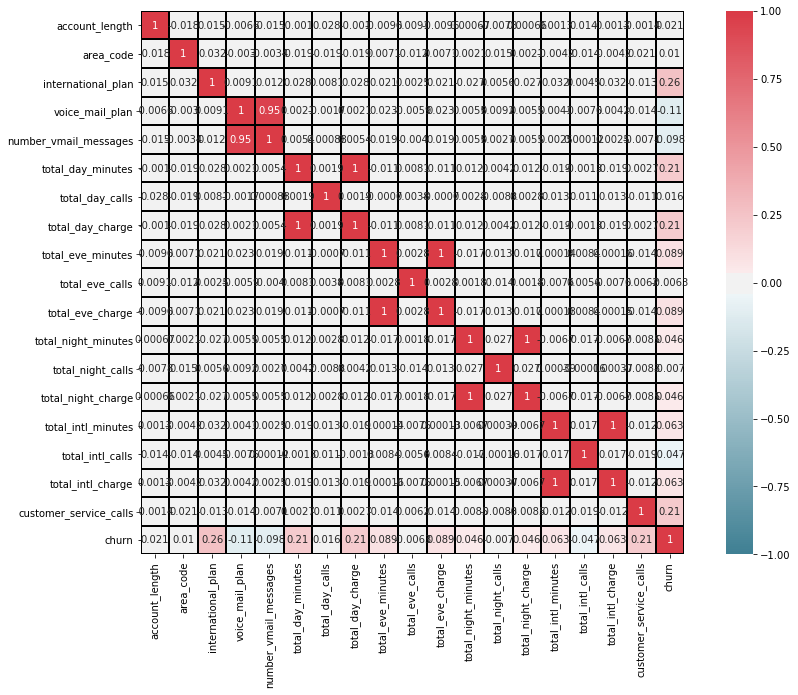

In [12]:
f, ax = plt.subplots(figsize=(15,10))  

corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)
plt.show()

Box Plot

[]

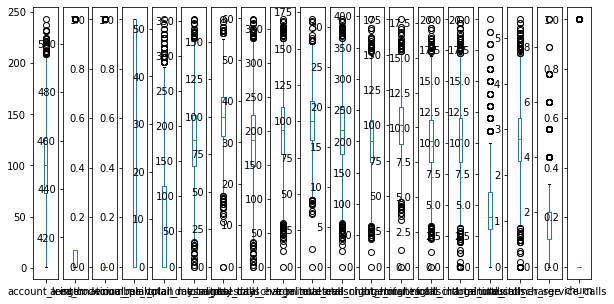

In [13]:
df.plot(kind = 'box', subplots = True, figsize=(10,5))
plt.plot()

Hist Plot

[]

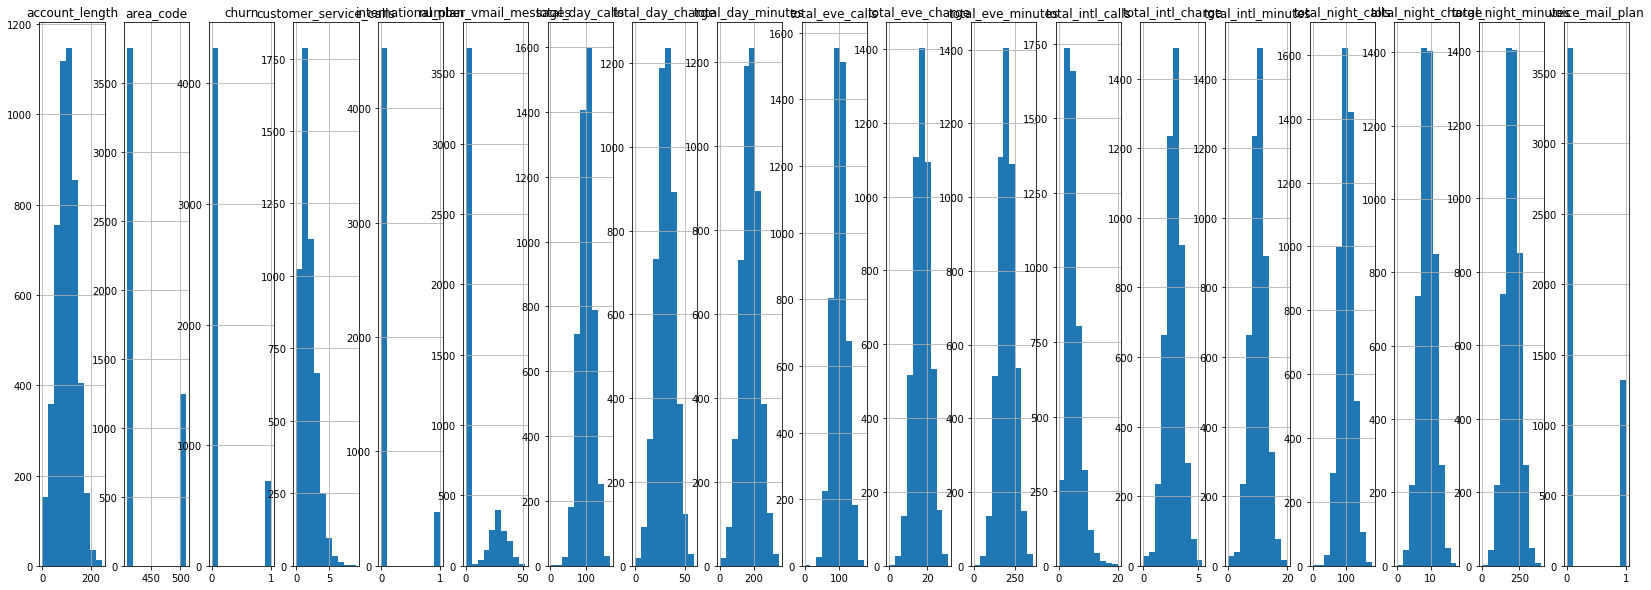

In [14]:
df.hist(layout=(1,20), figsize=(30,10))
plt.plot()

Violin Plot

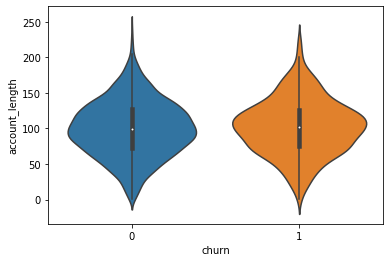

In [15]:
sns.violinplot(x="churn", y="account_length", data=df);

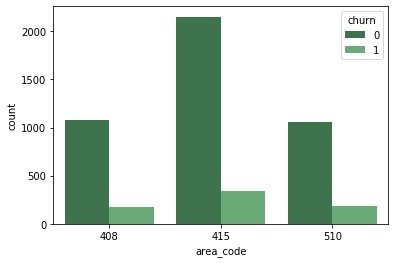

In [16]:
sns.countplot(x='area_code', hue="churn", data=df, palette="Greens_d");

Bubble Plot

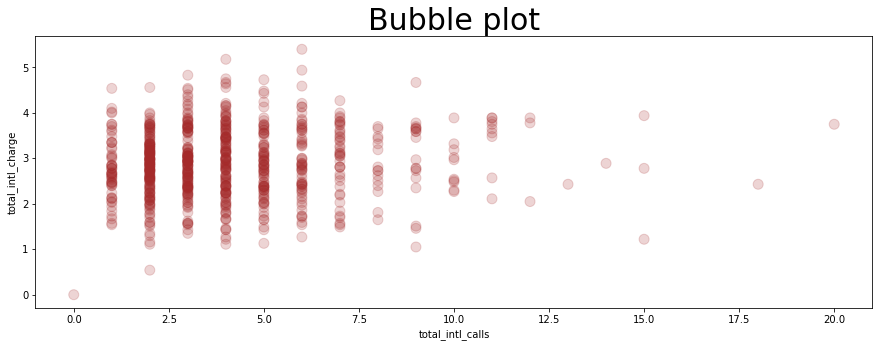

In [17]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.scatter(x = df['total_intl_calls'], y = df['total_intl_charge'], s = df['churn']*100, alpha = 0.2, color = 'brown')
plt.title('Bubble plot', fontsize = 30)
plt.xlabel('total_intl_calls')
plt.ylabel('total_intl_charge')
plt.show()

Count Plot

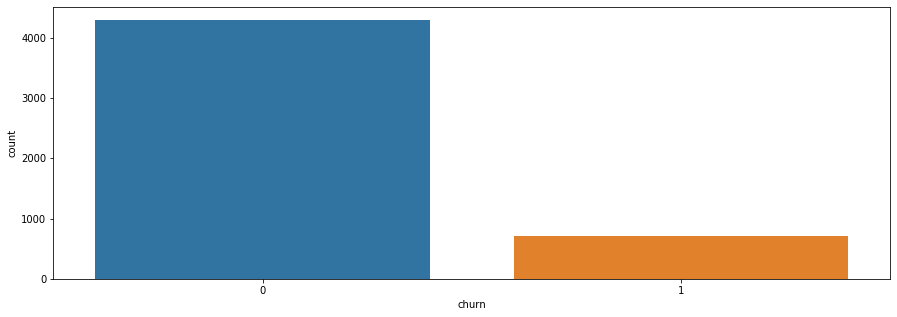

In [18]:
sns.countplot(x='churn',data=df)

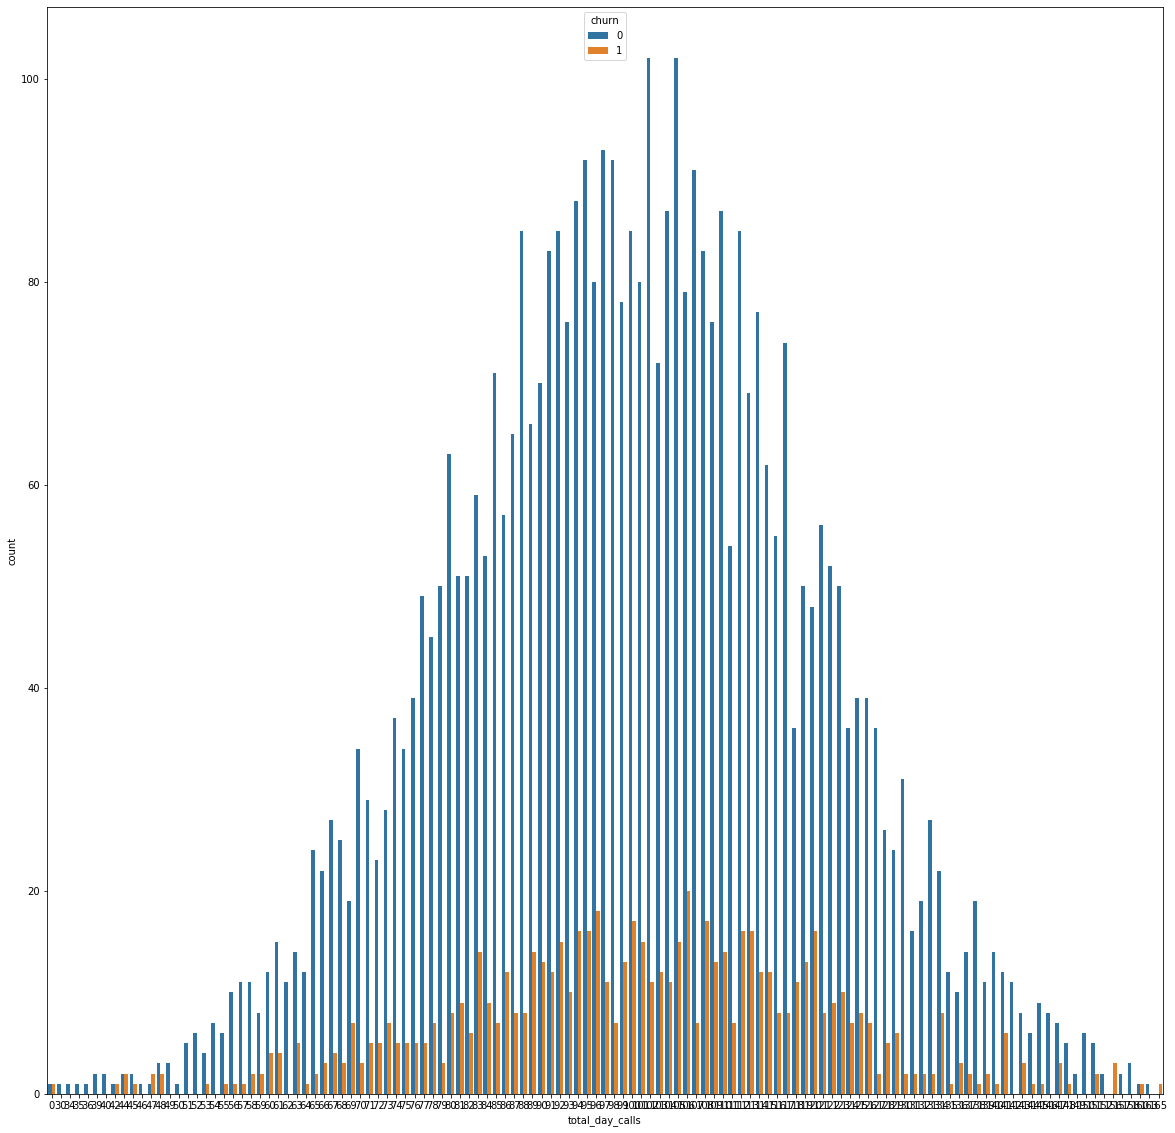

In [19]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='total_day_calls',hue='churn',data=df)

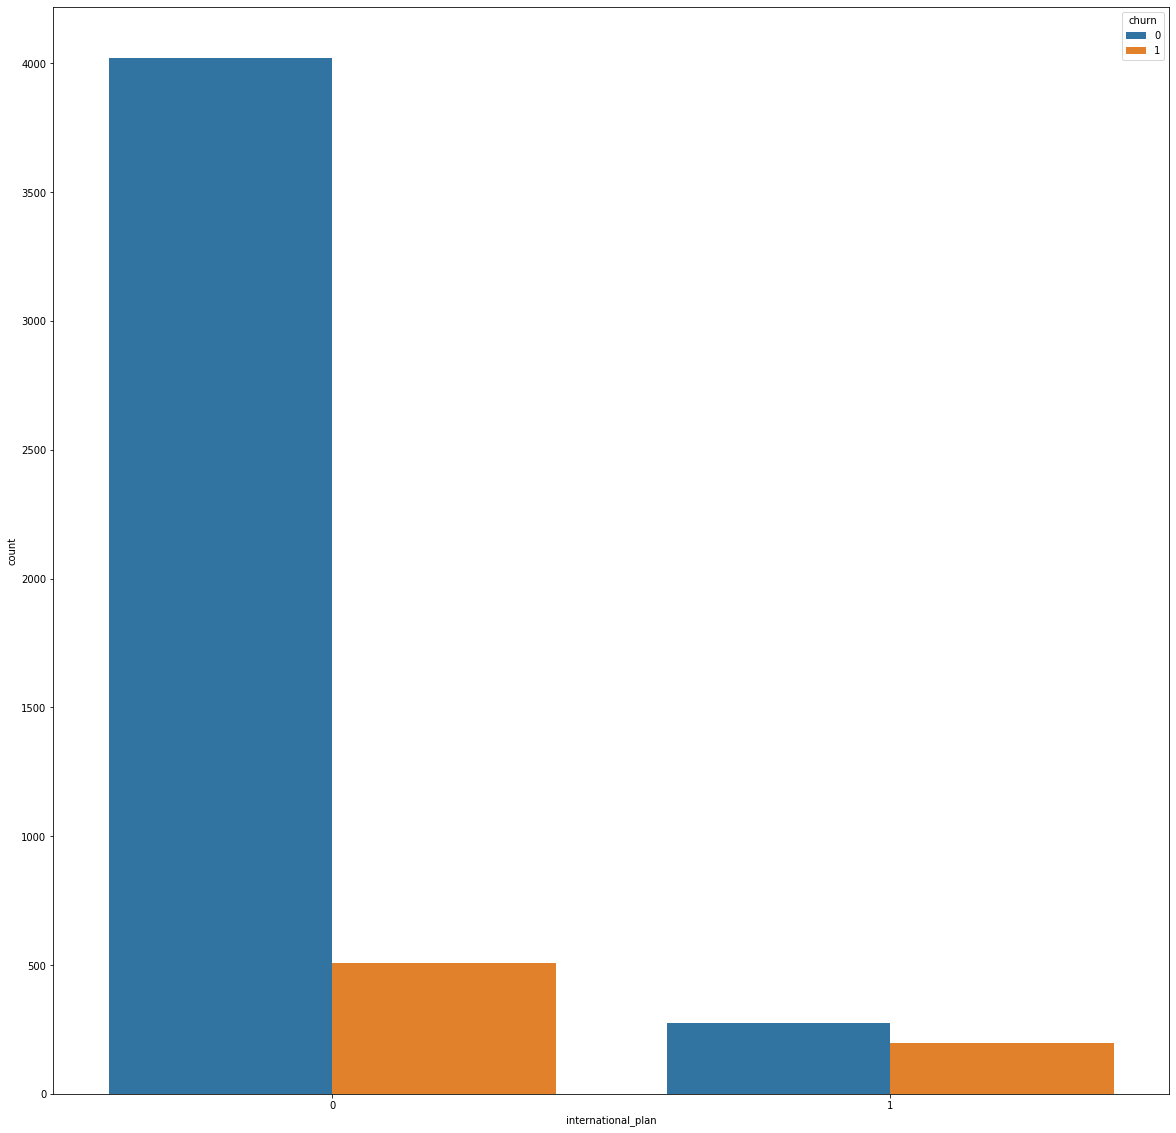

In [20]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='international_plan',hue='churn',data=df)

Rel Plot

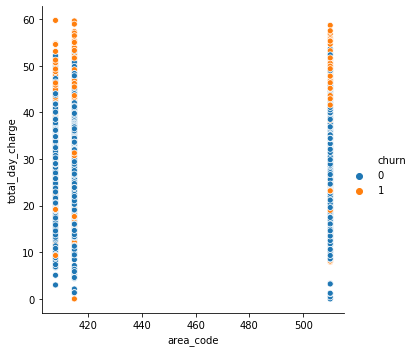

In [21]:
sns.relplot(x='area_code', y='total_day_charge', hue='churn', data=df)

Line Plot

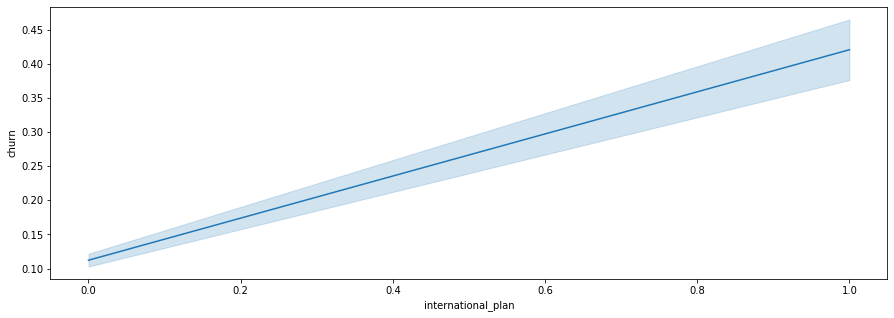

In [22]:
sns.lineplot(x="international_plan",y="churn",data=df)
plt.show()

Scatter Plot

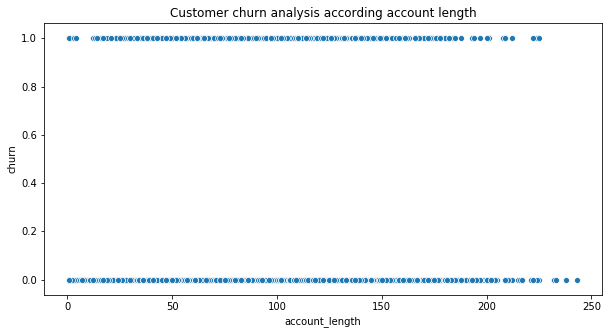

In [23]:
plt.figure(figsize=(10,5))
plt.xlabel("account_length")
plt.ylabel("churn")
plt.title("Customer churn analysis according account length")
sns.scatterplot(x='account_length',y='churn',data=df)

In [24]:
#removing corelated variables
rmev = ['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
train = df.drop(rmev,axis=1)
test = df.drop(rmev,axis=1)

In [25]:
#Updating values after removal
cname = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
         'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
         'customer_service_calls']

cat_names = ['area_code', 'international_plan', 'voice_mail_plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls', 'customer_service_calls']

cat_name :- ['area_code', 'international_plan', 'voice_mail_plan']


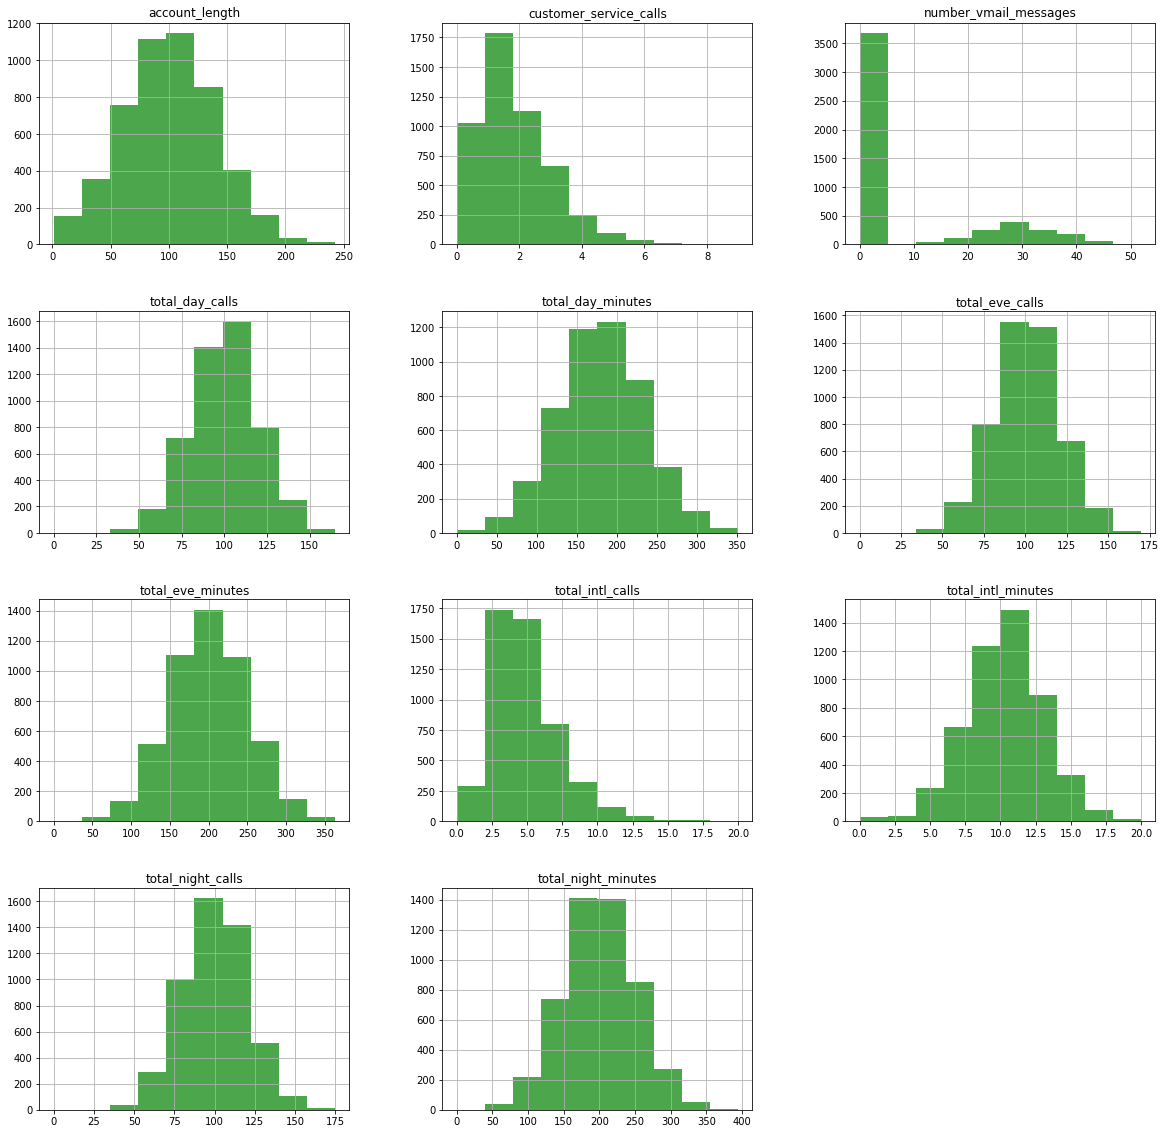

In [26]:
train[cname].hist(figsize=(20,20),color='g',alpha = 0.7)
plt.show()

# Data Preprocessing

Scalling

In [27]:
def scale_standard(df):
    for i in cname:
        
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [28]:
train = scale_standard(train)
test = scale_standard(test)

In [29]:
x = train.iloc[:,:14]
y = train.iloc[:,14]
y=y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [30]:
(x_train.shape),(y_train.shape)

((3500, 14), (3500,))

Prediction Function

In [31]:
def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

Logistic Regression

In [32]:
lr = LogisticRegression(random_state=101).fit(x_train,y_train)


pred(lr,x_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0   1
churn          
0      1259  34
1       153  54

Classification paradox :------->>
Accuracy :-  87.53

Specificity //  True Negative Rate :-  97.37

Sensivity // True Positive Rate // Recall :-  26.09

False Negative Rate :-  73.91

False Postive Rate :-  2.63

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1293
           1       0.61      0.26      0.37       207

    accuracy                           0.88      1500
   macro avg       0.75      0.62      0.65      1500
weighted avg       0.85      0.88      0.85      1500



In [33]:
logisticRegressionScore = lr.score(x_test, y_test)
print("Score of Logistic Regression : {0}".format(logisticRegressionScore))

Score of Logistic Regression : 0.8753333333333333


Random Forest Classifier

In [34]:
rf = RandomForestClassifier(n_estimators=100,random_state=101).fit(x_train,y_train)

pred(rf,x_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1284    9
1        67  140

Classification paradox :------->>
Accuracy :-  94.93

Specificity //  True Negative Rate :-  99.3

Sensivity // True Positive Rate // Recall :-  67.63

False Negative Rate :-  32.37

False Postive Rate :-  0.7

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1293
           1       0.94      0.68      0.79       207

    accuracy                           0.95      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.95      0.95      0.95      1500



In [35]:
randomForestScore = rf.score(x_test, y_test)
print("Accuracy of Random Forest Classifier is : ", randomForestScore)

Accuracy of Random Forest Classifier is :  0.9493333333333334


KNeighbors Classifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

pred(knn,x_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0   1
churn          
0      1280  13
1       165  42

Classification paradox :------->>
Accuracy :-  88.13

Specificity //  True Negative Rate :-  98.99

Sensivity // True Positive Rate // Recall :-  20.29

False Negative Rate :-  79.71

False Postive Rate :-  1.01

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1293
           1       0.76      0.20      0.32       207

    accuracy                           0.88      1500
   macro avg       0.82      0.60      0.63      1500
weighted avg       0.87      0.88      0.85      1500



In [37]:
knnScore = knn.score(x_test, y_test)
print("Score of KNN Regression : {0}".format(knnScore))

Score of KNN Regression : 0.8813333333333333


GaussianNB

In [38]:
naive = GaussianNB().fit(x_train,y_train)

pred(naive,x_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1187  106
1       110   97

Classification paradox :------->>
Accuracy :-  85.6

Specificity //  True Negative Rate :-  91.8

Sensivity // True Positive Rate // Recall :-  46.86

False Negative Rate :-  53.14

False Postive Rate :-  8.2

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1293
           1       0.48      0.47      0.47       207

    accuracy                           0.86      1500
   macro avg       0.70      0.69      0.69      1500
weighted avg       0.85      0.86      0.86      1500



In [39]:
naiveBayesScore = naive.score(x_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ", naiveBayesScore)

Accuracy of Naive Bayes Classifier is :  0.856


Decision Tree Classifier

In [40]:
dtc = DecisionTreeClassifier().fit(x_train,y_train)

pred(dtc,x_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1235   58
1        57  150

Classification paradox :------->>
Accuracy :-  92.33

Specificity //  True Negative Rate :-  95.51

Sensivity // True Positive Rate // Recall :-  72.46

False Negative Rate :-  27.54

False Postive Rate :-  4.49

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1293
           1       0.72      0.72      0.72       207

    accuracy                           0.92      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.92      0.92      0.92      1500



In [41]:
decisionTreeScore = dtc.score(x_test, y_test)
print("Accuracy of Decision Tree Classifier is : ", decisionTreeScore)

Accuracy of Decision Tree Classifier is :  0.9233333333333333


# CONCLUSION:
According to Comparison of Classifiers section RandomForestClassifier is the best option for this test data.

As above RANDOM FOREST fits best for dataset out of all our tested models

In [42]:
final_Model = RandomForestClassifier(random_state=50, n_estimators = 500,n_jobs=-1)
final_Model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

Features Importance

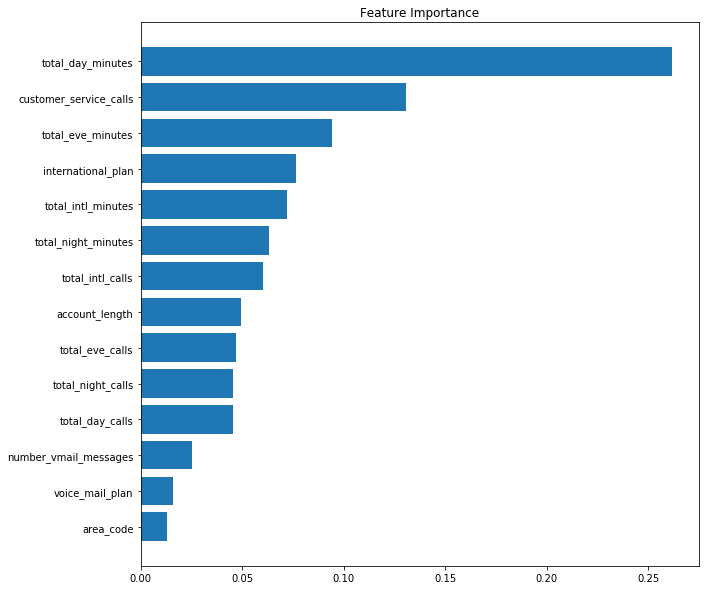

In [43]:
importances = final_Model.feature_importances_
indices = np.argsort(importances)[::1]

names = [train.columns[i] for i in indices]

fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

plt.barh(range(x.shape[1]),importances[indices],align = 'center')
plt.yticks(range(x.shape[1]), names)
plt.show()

Final Test Data Predictions

In [44]:
Churn_Pred = final_Model.predict(x)
cm = pd.crosstab(y,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()

print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

CONFUSION MATRIX ----->> 
col_0     0    1
churn           
0      4284    9
1        64  643

Accuracy :-  98.54
False Negative Rate :-  9.05
False Postive Rate :-  0.21


In [45]:
print(classification_report(y,Churn_Pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4293
           1       0.99      0.91      0.95       707

    accuracy                           0.99      5000
   macro avg       0.99      0.95      0.97      5000
weighted avg       0.99      0.99      0.99      5000



In [46]:
from sklearn.externals import joblib
joblib.dump(final_Model,'Customer_Churn_Analysis.obj')

['Customer_Churn_Analysis.obj']